# Time-Series Forecasting: Predicting Stock Prices Using An LSTM Model


Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (e.g. images), but also entire sequences of data (such as speech or video inputs). refence:https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf
from datetime import datetime

In [2]:
def get_stock_data(symbol, start_date, end_date):
  data = yf.download(symbol, start=start_date,end=end_date)
  data.index = pd.to_datetime(data.index, unit = 'id')
  return data

In [12]:
def train_LSTM(df, window_size = 60, col='Close'):
  #(1) spliting data
  # Create a new dataframe with only the 'Close column 
  data = df.filter([col])
  # Convert the dataframe to a numpy array
  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  # (2) Scale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(window_size, len(train_data)):
      x_train.append(train_data[i-window_size:i, 0])
      y_train.append(train_data[i, 0])
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  # Create the testing data set
 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(window_size, len(test_data)):
      x_test.append(test_data[i-window_size:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  print("The rmse of model is: ", rmse)

  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
  plt.show()
  return model

In [48]:
def train_LSTM2(df, window_size = 60, col='Close'):
  #(1) spliting data
  # Create a new dataframe with only the 'Close column 
  data = df.filter([col])
  # Convert the dataframe to a numpy array
  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  # (2) Scale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(window_size, len(train_data)):
      x_train.append(train_data[i-window_size:i, 0])
      y_train.append(train_data[i, 0])
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  # Build the LSTM model
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
  #model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  #model.add(LSTM(units = 128, return_sequences = True))
  #model.add(Dropout(0.2))
  model.add(LSTM(units = 64, return_sequences = False))
 

  model.add(Dense(units = 32))
  #model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(Dense(units = 10))
  #model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))


  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  # Create the testing data set
 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(window_size, len(test_data)):
      x_test.append(test_data[i-window_size:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  print("The rmse of model is: ", rmse)

  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
  plt.show()
  return model

In [56]:
symbol = 'AMZN'
start_date = '2020-01-01'
end_date = datetime.now()

df = get_stock_data(symbol, start_date, end_date)
print(df.shape)
df.head()

[*********************100%***********************]  1 of 1 completed
(866, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


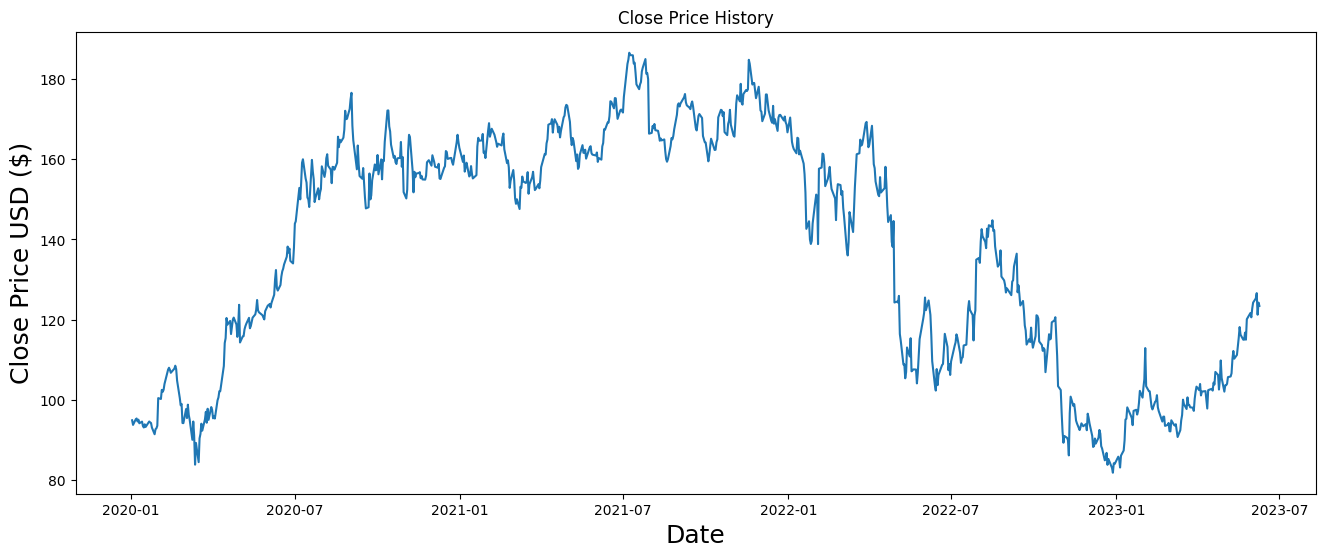

In [57]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

2/2 [==============================] - 1s 32ms/step
The rmse of model is:  3.119134862574316


<ipython-input-12-62140aef051e>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


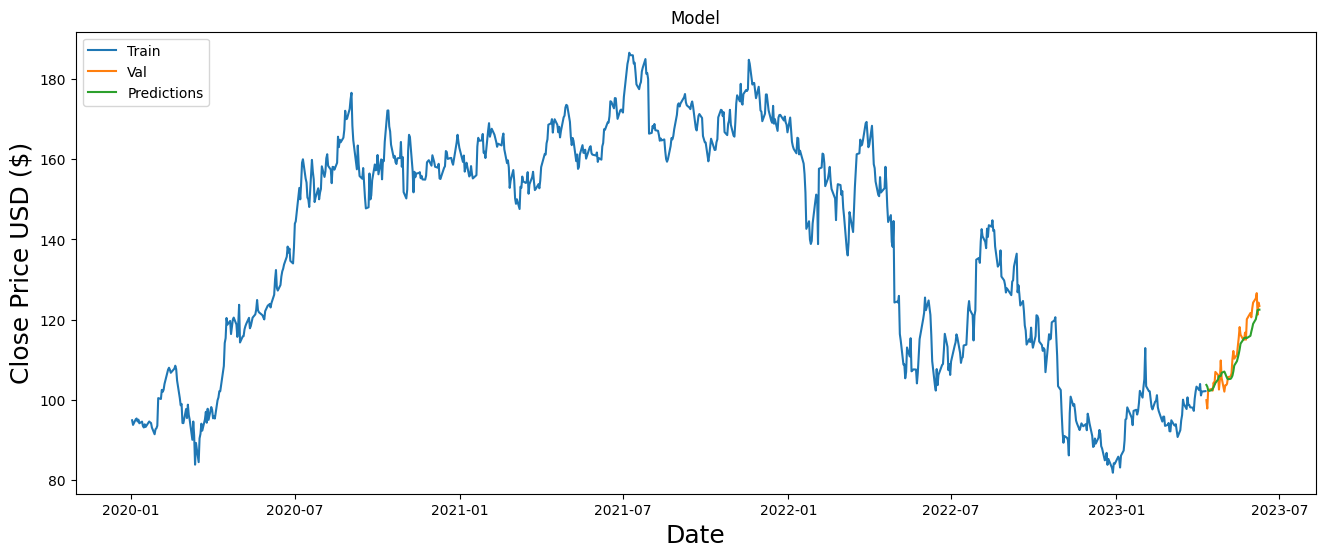

In [58]:
model = train_LSTM(df, col='Close')


2/2 [==============================] - 1s 26ms/step
The rmse of model is:  3.145780018385258


<ipython-input-48-f8e6fbd0cf35>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


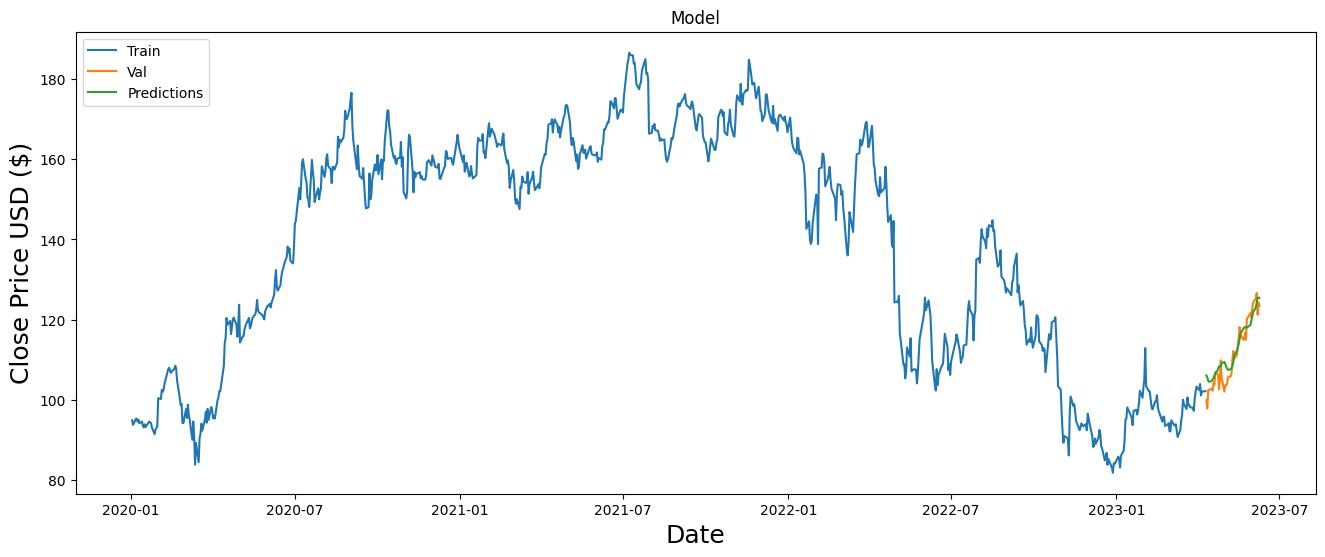

In [49]:
model2 = train_LSTM2(df, col='Close')

In [ ]:
print(history2.history.keys())
plt.plot(history2.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
